Correct data for background and save the results as an extra layer in the anndata object:

Load relevant packages and data:

In [1]:
import sys,os
path = '/nfs/team283/aa16/InSituCellTools/'
os.chdir(path)
sys.path.append(path)

In [2]:
import pickle
import anndata
import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
import matplotlib
data_type = 'float32'
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

/nfs/users/nfs_a/aa16/.local/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [3]:
adata_wta = pickle.load(open(path + "data/nanostringWTA_fetailBrain_AnnData.p", "rb" ))

In [4]:
adata_wta = adata_wta[adata_wta.obs['GoodQuality'],:]

In [8]:
adata_wta.obs['GeoLOD2.0_01'] = adata_wta.obs['NegGeoMean_01'] * adata_wta.obs['NegGeoSD_01']**2

Trying to set attribute `.obs` of view, copying.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [9]:
AOI_types = ('HOPXpos', 'EOMESpos','Ring', 'Residual')
slides = np.array(('00MU', ('00MV', '00MV-2')))

detection_list = []
vcdepth_list = []
nuclei_list = []
for j in range(len(AOI_types)):
    for k in range(len(slides)):
        subset = [adata_wta.obs['AOI_type'][i] == AOI_types[j] and adata_wta.obs['slide'][i] in slides[k]
                  for i in range(len(adata_wta.obs['AOI_type']))]
        adata_subset = adata_wta[subset,:]
        detection_list.append([sum(adata_subset.X[i,:] > adata_subset.obs['GeoLOD2.0_01'].iloc[i]) for i in range(np.shape(adata_subset)[0])])
        vcdepth_list.append(np.array(adata_subset.obs['VCDepth']))
        nuclei_list.append(np.array(adata_subset.obs['nuclei']))

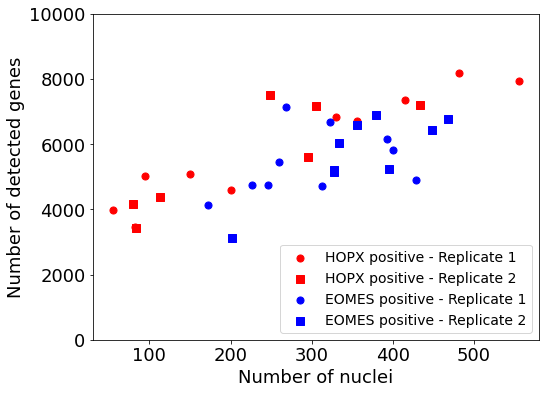

In [12]:
replicate = ('Replicate 1', 'Replicate 2')
AOI_labels = ('HOPX positive', 'EOMES positive', 'Reference Ring', 'Background')
colours = ('Red', 'Blue', 'Yellow', 'Grey')
markers = ('o', 's', 'x', '-')

SMALL_SIZE = 18
MEDIUM_SIZE = 18
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=14)  # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize=(8,6))

count = 0
for j in range(2):
    for k in range(len(slides)):
        plt.scatter(nuclei_list[count], detection_list[count], c = colours[j],
                    label = AOI_labels[j] + ' - ' + replicate[k], marker = markers[k],
                    s = 50)
        plt.legend(loc = 'lower right')
        plt.ylim(0,10000)
        plt.ylabel('Number of detected genes')
        plt.xlabel('Number of nuclei')
        count += 1
plt.savefig('../KR_NAS/0_publication_figures/Figure4_DetectedGenesPerAOI_vsNuclei_LoD20.pdf')